# Code Along - Image Processing

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# In Python script in vscode
# os.chdir(os.path.dirname(__file__)) #dirname gives the folders name, __file__ does not exist in Jupyter notebook

current_dir = os.path.abspath("") #We get the path to where this file is
print(f"{current_dir=}")

# List all files in current directory
current_dir_files = os.listdir(current_dir)
print(f"{current_dir_files}")

data_dir = os.path.abspath('../data/')
print(f"{data_dir=}")

os.listdir(data_dir)

current_dir='/Users/anna-mariasjolund/Documents/GitHub/Deep-Learning-Anna-MariaSjolund/code-alongs'
['Lec1-MLP_classification.ipynb', 'Lec3-image_processing.ipynb', 'Lec0-MLP_regression.ipynb', 'Lec2-MLP_image_classification.ipynb']
data_dir='/Users/anna-mariasjolund/Documents/GitHub/Deep-Learning-Anna-MariaSjolund/data'


['.DS_Store', 'Homer_Simpson_2006.png']

Original Shape: (390, 190, 4)


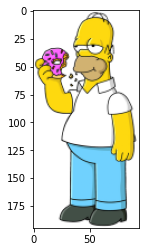

In [32]:
image = plt.imread(f"{data_dir}/Homer_Simpson_2006.png")
print(f"Original Shape: {image.shape}")

resize_factor = .5
new_size = int(image.shape[1]*resize_factor), int(image.shape[0]*resize_factor) #x and y

image = cv2.resize(image, new_size)
plt.imshow(image)

### Kernels

In [44]:
ridge_filter = np.array([[0, -1, 0], 
                        [-1, 4, -1], 
                        [0, -1, 0]])

blur_filter = np.array([[.0625, .125, .0625], 
                        [.125, .25, .125], 
                        [.0625, .125, .0625]])

outline_filter = np.array([[-1, -1, -1], 
                        [-1, 17, -1], 
                        [-1, -1, -1]])

filters = [ridge_filter, blur_filter, outline_filter]
filter_names = ["ridge", "blur", "outline"]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[Errno 17] File exists: '/Users/anna-mariasjolund/Documents/GitHub/Deep-Learning-Anna-MariaSjolund/data/processed_images'


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


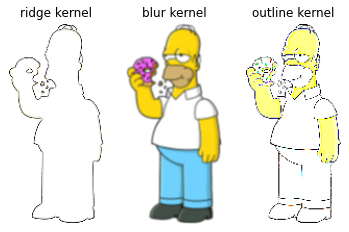

In [47]:
processed_images_path = f"{data_dir}/processed_images"

try: 
    os.mkdir(processed_images_path)
except FileExistsError as err:
    print(err)

fig, axes = plt.subplots(1, len(filters))

for ax, filter, filter_name in zip(axes, filters, filter_names):
    filtered_img = cv2.filter2D(image, -1, kernel=filter) #-1 means it will calculate the depth itself
    ax.imshow(filtered_img)
    ax.axis("off")
    ax.set(title = f"{filter_name} kernel")

    fig.savefig(f"{processed_images_path}/Filtered_images.png")

In [49]:
import shutil

source_path = f"{processed_images_path}/Filtered_images.png"
target_path = f"{processed_images_path}/Filtered_images_COPY.png"

shutil.copyfile(source_path, target_path)

'/Users/anna-mariasjolund/Documents/GitHub/Deep-Learning-Anna-MariaSjolund/data/processed_images/Filtered_images_COPY.png'